In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/Wholesale customers data.csv')

# Display the first few rows of the dataset
print(data.head())

# Drop non-predictive columns like 'Channel' and 'Region' if necessary
# For clustering, these columns are typically not needed
# data = data.drop(['Channel', 'Region'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Function to apply different clustering algorithms and evaluate their performance
def apply_clustering_algorithms(data):
    # Initialize a list to store silhouette scores for each clustering algorithm
    silhouette_scores = []

    # KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    kmeans_silhouette_score = silhouette_score(data, kmeans_labels)
    silhouette_scores.append(('KMeans', kmeans_silhouette_score))

    # Hierarchical clustering (Agglomerative Clustering)
    agg_cluster = AgglomerativeClustering(n_clusters=2)
    agg_labels = agg_cluster.fit_predict(data)
    agg_silhouette_score = silhouette_score(data, agg_labels)
    silhouette_scores.append(('Agglomerative Clustering', agg_silhouette_score))

    # Gaussian Mixture Models (GMM)
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm_labels = gmm.fit_predict(data)
    gmm_silhouette_score = silhouette_score(data, gmm_labels)
    silhouette_scores.append(('Gaussian Mixture Models', gmm_silhouette_score))

    return silhouette_scores

# Apply clustering algorithms and evaluate their performance
silhouette_scores = apply_clustering_algorithms(scaled_data)

# Display silhouette scores for each clustering algorithm
print("Silhouette Scores:")
for algorithm, score in silhouette_scores:
    print(f"{algorithm}: {score}")

# Plot the clusters if the data is 2-dimensional (for visualization)
if scaled_data.shape[1] == 2:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('KMeans Clustering')

    plt.subplot(1, 3, 2)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis')
    plt.title('Agglomerative Clustering')

    plt.subplot(1, 3, 3)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=gmm_labels, cmap='viridis')
    plt.title('Gaussian Mixture Models')

    plt.show()


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Scores:
KMeans: 0.37323636511581165
Agglomerative Clustering: 0.3680209405194812
Gaussian Mixture Models: 0.37083267754790566


KMeans:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

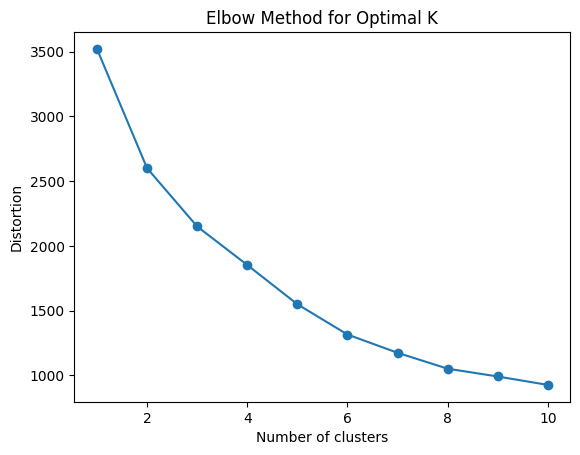

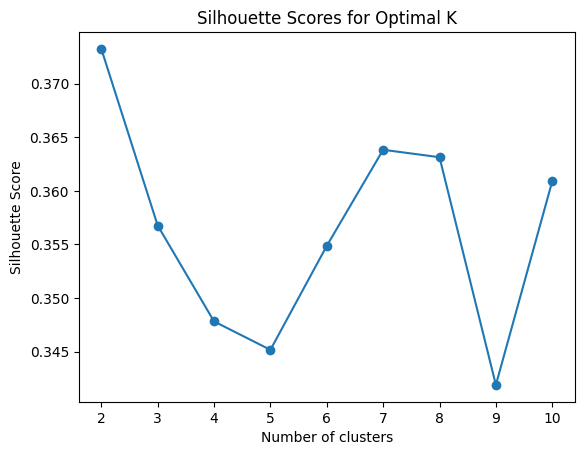

Gaussian Mixture Models:


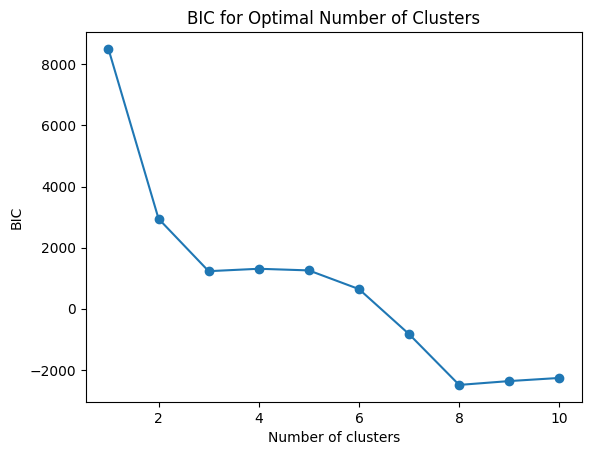

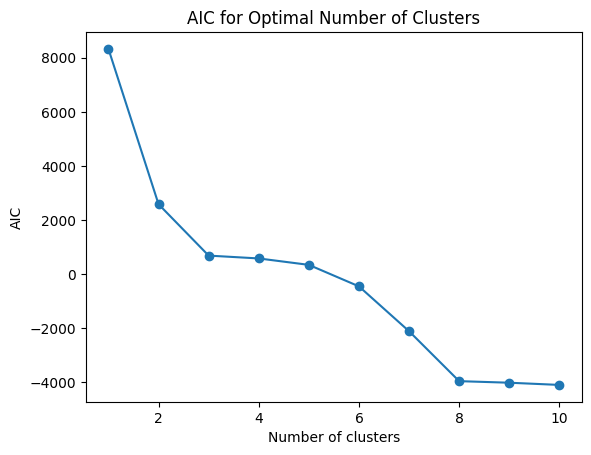

In [4]:
# Function to find the optimum number of clusters for KMeans using the elbow method
def find_optimal_kmeans_clusters(data, max_clusters=10):
    distortions = []
    silhouette_scores = []

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        if i > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plotting the elbow method
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # Plotting silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Optimal K')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()



# Function to find the optimum number of clusters for Gaussian Mixture Models using BIC/AIC
def find_optimal_gmm_clusters(data, max_clusters=10):
    bics = []
    aics = []

    for i in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=i, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))

    # Plotting BIC
    plt.plot(range(1, max_clusters + 1), bics, marker='o')
    plt.title('BIC for Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.show()

    # Plotting AIC
    plt.plot(range(1, max_clusters + 1), aics, marker='o')
    plt.title('AIC for Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.show()

# Find the optimum number of clusters for each algorithm
print("KMeans:")
find_optimal_kmeans_clusters(scaled_data)



print("Gaussian Mixture Models:")
find_optimal_gmm_clusters(scaled_data)

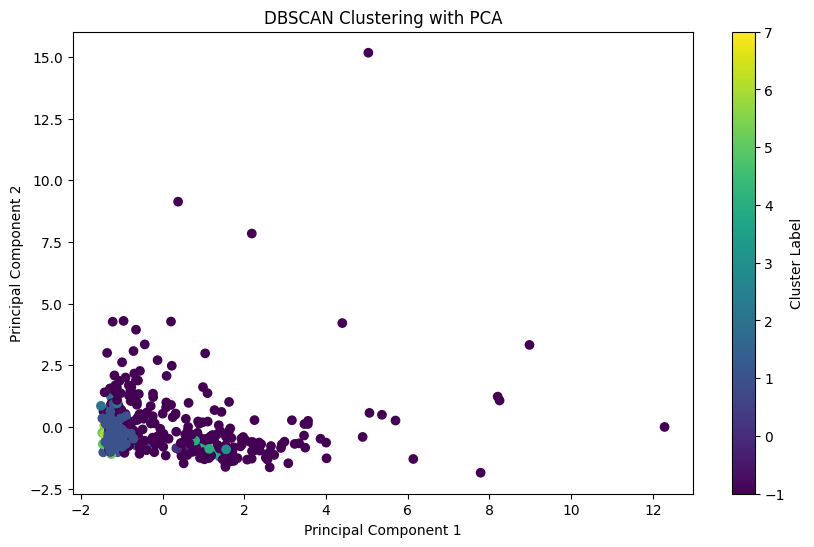

In [6]:
# Perform PCA for dimensionality reduction
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
labels = dbscan.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()